In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold




# Data Preprcessing 

In [223]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


loaded the dataset for analysis

In [224]:
df.shape

(18249, 14)

Checked the dataset and found, dataset has 14 cols and 18249 rows

# check for null values

In [225]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value in the dataset

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There is combination of string and numerical data 

In [227]:
df.head(70)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,13,2015-09-27,1.07,370321.17,262107.44,61870.63,680.80,45662.30,20533.87,25125.65,2.78,conventional,2015,Atlanta
66,14,2015-09-20,0.93,516432.60,346118.51,82762.72,1349.41,86201.96,33698.43,52442.25,61.28,conventional,2015,Atlanta
67,15,2015-09-13,1.07,417232.18,278048.26,62485.97,714.93,75983.02,46290.32,29678.76,13.94,conventional,2015,Atlanta
68,16,2015-09-06,0.97,472136.53,303113.24,73675.85,911.25,94436.19,49833.55,44549.67,52.97,conventional,2015,Atlanta


In [228]:
df['month']=pd.DatetimeIndex(df['Date']).month

Added a column of month extarcted from date column

In [229]:
def change_month(col):
    if col==1:
        return 'Jan'
    elif col==2:
        return 'Feb'
    elif col==3:
        return 'Mar'
    elif col==4:
        return 'Apr'
    elif col==5:
        return 'May'
    elif col==6:
        return 'Jun'
    elif col==7:
        return 'Jul'
    elif col==8:
        return 'Aug'
    elif col==9:
        return 'Sep'
    elif col==10:
        return 'Oct'
    elif col==11:
        return 'Nov'
    else:
        return 'Dec'
    

df['month']=df['month'].apply(change_month)

Encoded the month ineteger into month name using function

In [230]:
df['day']=pd.DatetimeIndex(df['Date']).day

In [231]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Dec,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Dec,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Dec,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Dec,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Nov,29


In [232]:
df['month'].value_counts()

Jan    1944
Mar    1836
Feb    1728
Oct    1512
Jul    1512
May    1512
Nov    1404
Aug    1404
Apr    1404
Dec    1403
Sep    1296
Jun    1294
Name: month, dtype: int64

# EDA

<AxesSubplot:xlabel='type', ylabel='count'>

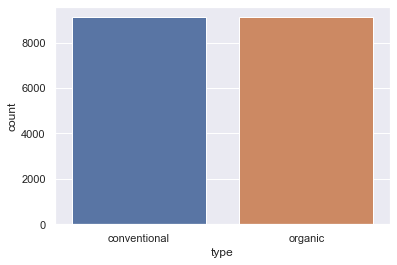

In [233]:
sns.countplot(df['type'])

In [234]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are 9126 conventional avocados and 9123 organic avocados 

<AxesSubplot:xlabel='type', ylabel='count'>

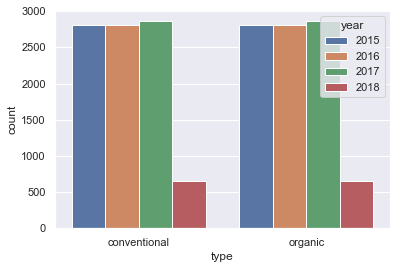

In [235]:
sns.countplot(x='type',hue='year',data=df)

The sale of the conventional and organic both avocados has decreased to around 600.

In [236]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

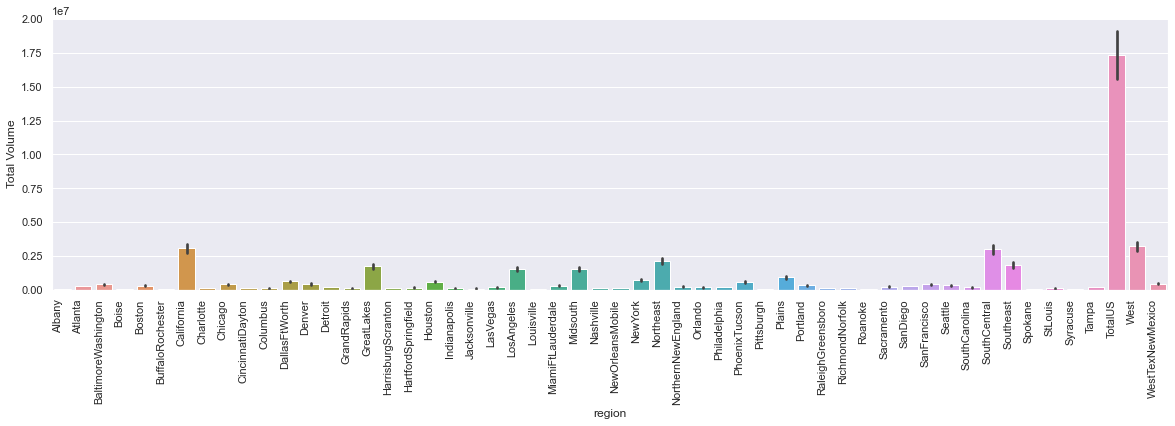

In [237]:
plt.figure(figsize=(20,5))
chart=sns.barplot(x='region',y='Total Volume',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')


(i) If we leave the 'TotalUS' then we can see maximun avocaso sold at west 
followed by SouthCentral, California ,Northeast, southeast,mideast, etc

(ii) Retail shop in the following places has less selling comparitavely 
----Boise,Syracuse,Spokane,Pittsburgh,Louisville,Roanoke,Albany

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

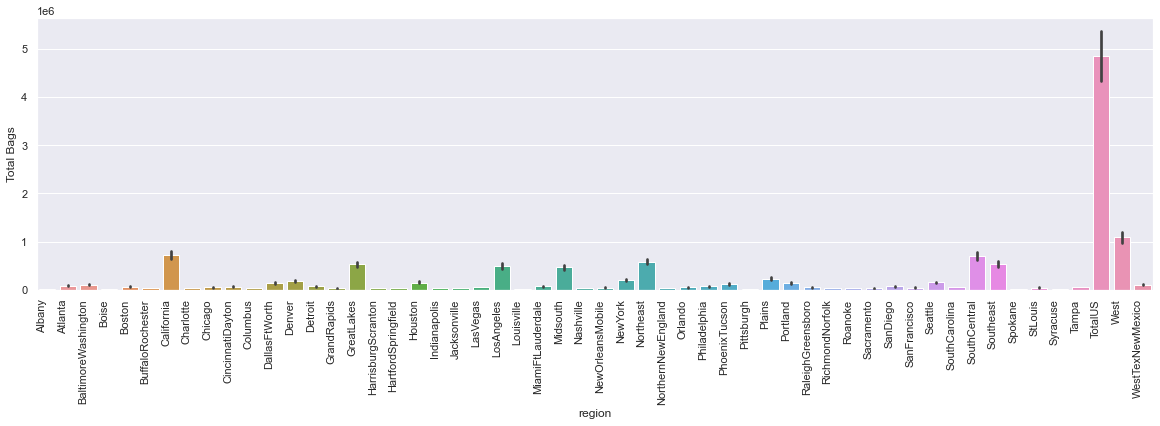

In [238]:
plt.figure(figsize=(20,5))
chart=sns.barplot(x='region',y='Total Bags',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

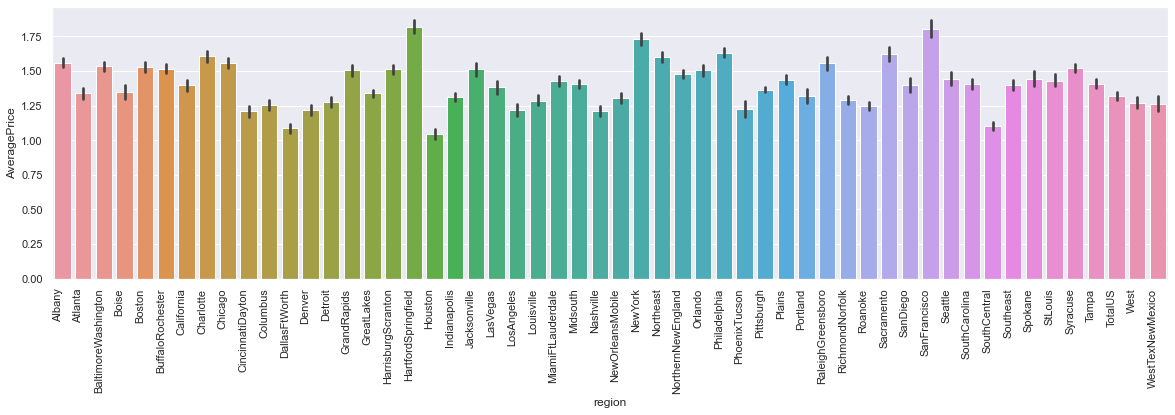

In [239]:
plt.figure(figsize=(20,5))
chart=sns.barplot(x='region',y='AveragePrice',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')

(i) Average price is high at HartfordSpringfield and Sanfrancisco

(ii) Average price is low at Houston

<AxesSubplot:xlabel='year', ylabel='4046'>

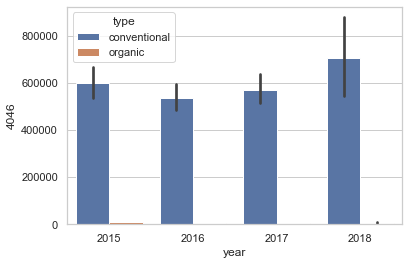

In [240]:
sns.set_theme(style='whitegrid')
sns.barplot(x='year',y='4046',hue='type',data=df)

<AxesSubplot:xlabel='year', ylabel='4225'>

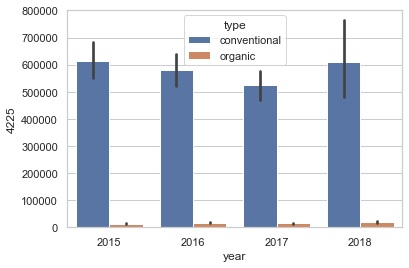

In [241]:
sns.set_theme(style='whitegrid')
sns.barplot(x='year',y='4225',hue='type',data=df)

<AxesSubplot:xlabel='year', ylabel='4770'>

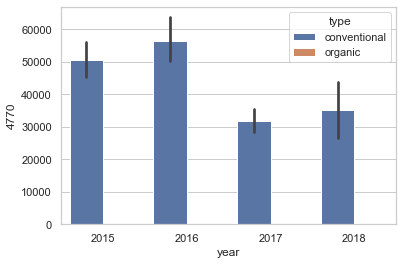

In [242]:
sns.set_theme(style='whitegrid')
sns.barplot(x='year',y='4770',hue='type',data=df)

In case of 4046,4225,4770 PLU the conventional avocado has been sold all the year, few Organic has been sold in case of 4225 and 4046

<AxesSubplot:xlabel='year', ylabel='Small Bags'>

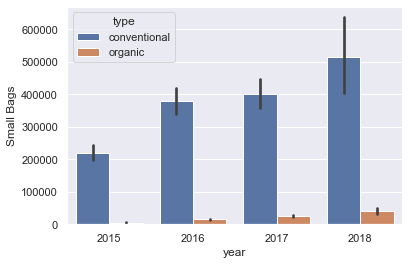

In [243]:
sns.set_theme(style='darkgrid')
sns.barplot(x='year',y='Small Bags', hue='type',data=df)

Small bags sell has improved from 2015 to 2018. Most are conventional avocados.The organic avocados selling has gradually started increasing but in very less volume

<AxesSubplot:xlabel='year', ylabel='Large Bags'>

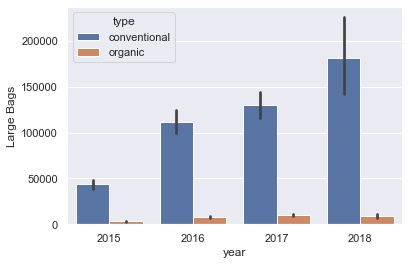

In [244]:
sns.set_theme(style='darkgrid')
sns.barplot(x='year',y='Large Bags', hue='type',data=df)

Large bags sell has improved from 2015 to 2018. Maximum are conventional avocados.The organic avocados selling has gradually started increasing but in very less volume. Although in 2018 the organic avocado sell has declined

<AxesSubplot:xlabel='year', ylabel='XLarge Bags'>

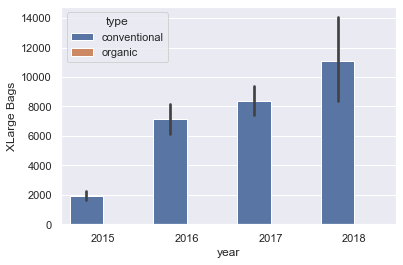

In [245]:
sns.set_theme(style='darkgrid')
sns.barplot(x='year',y='XLarge Bags', hue='type',data=df)

XLarge bags sell has improved from 2015 to 2018. All the xlarge bags are conventional avocados 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

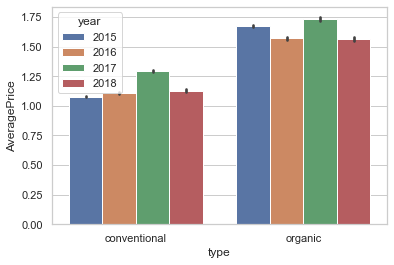

In [246]:
sns.set_theme(style='whitegrid')
sns.barplot(x='type',y='AveragePrice', hue='year',data=df)

The avearage price of organic avocado is more than conventional. During 2015-18 the average price of a avocodo was highest in 2017.

<AxesSubplot:xlabel='4046', ylabel='Total Volume'>

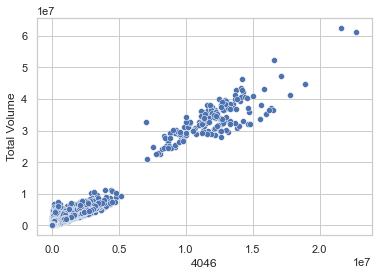

In [247]:
sns.scatterplot(x='4046',y='Total Volume', data=df)

<AxesSubplot:xlabel='4225', ylabel='Total Volume'>

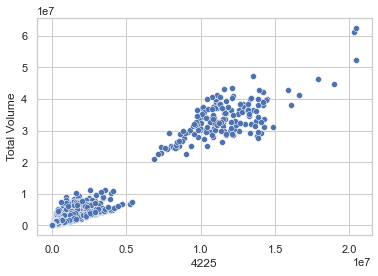

In [248]:
sns.scatterplot(x='4225',y='Total Volume', data=df)

<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

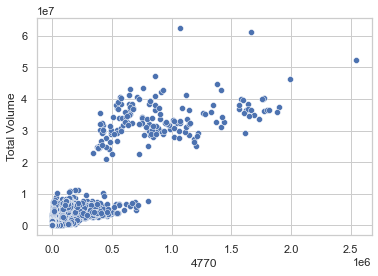

In [249]:
sns.scatterplot(x='4770',y='Total Volume', data=df)

4046,4225 are much correlated with Total volume. Sell of 4046,4225 will increase the Total Volume.4770 is less correlated to total volume. We need to improvise the 4770

<AxesSubplot:xlabel='Small Bags', ylabel='Total Volume'>

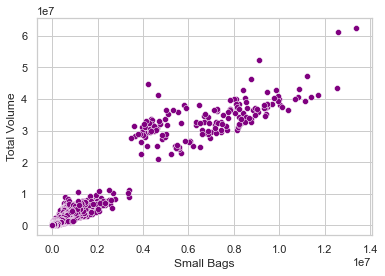

In [250]:
sns.scatterplot(x='Small Bags',y='Total Volume', data=df,color='purple')

Total Volume is much correlated to small bags

<AxesSubplot:xlabel='Large Bags', ylabel='Total Volume'>

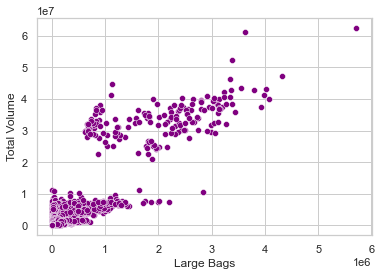

In [251]:
sns.scatterplot(x='Large Bags',y='Total Volume', data=df,color='purple')

<AxesSubplot:xlabel='XLarge Bags', ylabel='Total Volume'>

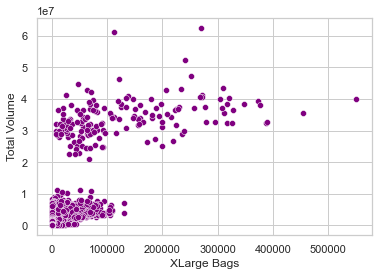

In [252]:
sns.scatterplot(x='XLarge Bags',y='Total Volume', data=df,color='purple')

Company should produce small bag of avocado more rather than large and Xlarge bags

<AxesSubplot:xlabel='4770', ylabel='Large Bags'>

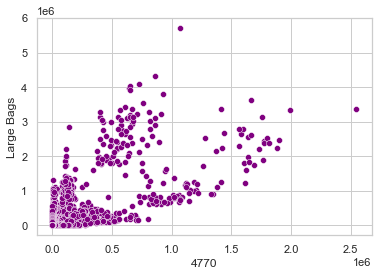

In [253]:
sns.scatterplot(x='4770',y='Large Bags', data=df,color='purple')

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

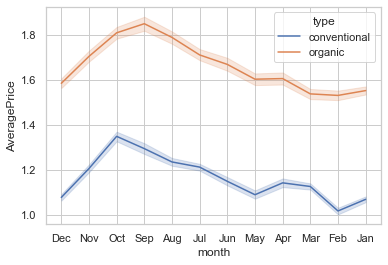

In [254]:
sns.set_theme(style='whitegrid')
sns.lineplot(x='month',y='AveragePrice',hue='type',data=df)

(i) Avarage price of avocado has been highest in the month of Sep,Oct

(ii) Avarage price of avocado has been lowest in feb

(iii) Organic Avocado's highest price was in Oct month

<AxesSubplot:xlabel='month', ylabel='Total Volume'>

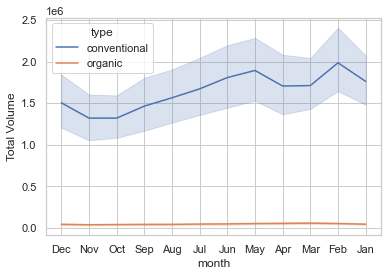

In [255]:
sns.set_theme(style='whitegrid')
sns.lineplot(x='month',y='Total Volume',hue='type',data=df)

(i) Conventional avocado has been sold highest in the month of February

(ii) From October to November the sell has ramain lowest

(iii) Organic acocado selling has been average through out the year

<AxesSubplot:xlabel='month', ylabel='Small Bags'>

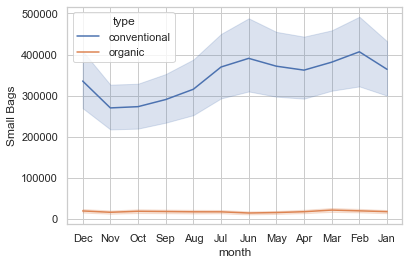

In [256]:
sns.set_theme(style='whitegrid')
sns.lineplot(x='month',y='Small Bags',hue='type',data=df)

<AxesSubplot:xlabel='month', ylabel='Large Bags'>

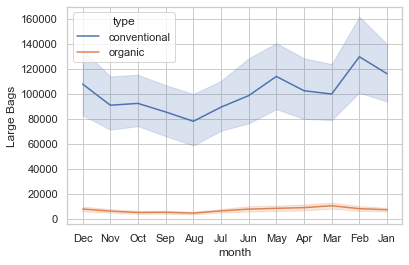

In [257]:
sns.set_theme(style='whitegrid')
sns.lineplot(x='month',y='Large Bags',hue='type',data=df)

<AxesSubplot:xlabel='month', ylabel='XLarge Bags'>

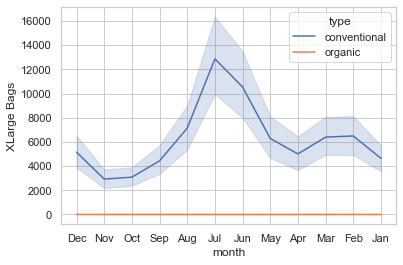

In [258]:
sns.set_theme(style='whitegrid')
sns.lineplot(x='month',y='XLarge Bags',hue='type',data=df)

(i) Selling of XLarge bags was in peak in the month of Jul

<AxesSubplot:xlabel='day', ylabel='Total Volume'>

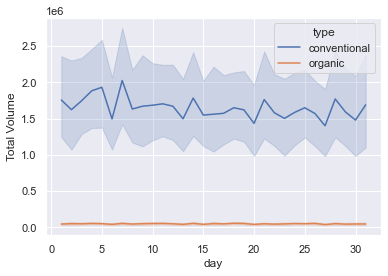

In [259]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='day',y='Total Volume',hue='type',data=df)

Through out the month the selling of avocado is average

In [260]:
print(df['AveragePrice'].mean())
print(df['AveragePrice'].max())
print(df['AveragePrice'].min())

1.4059784097758825
3.25
0.44


(i) Average price of Avocado is 1.40 
(ii) Maximum price of Avocado is 3.25
(ii) Minimym price of Avocado is 0.44

In [261]:
print (df['Total Volume'].mean())
print (df['Total Volume'].max())
print (df['Total Volume'].min())

850644.0130089332
62505646.52
84.56


(i) Average volume sold is 850644

(ii) Maximum volume sold is 62505646
 
(iii) Minimum volume sold is 84.56

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
 14  month         18249 non-null  object 
 15  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(4)
memory usage: 2.2+ MB


# Feature Engineering

The first column is unnamed which is sl no and repeating after the count of 51 , its not so significant so we can drop it

In [263]:
df.drop(columns=['Unnamed: 0'],inplace=True)

There are few columns which are not necessary of regression model, so we will drop these


In [264]:
df.drop(columns=['Date','day'],inplace=True)

# Encoding of categorical Columns

In [265]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # instantiatethe Label Encoder

In [266]:
df.type=le.fit_transform(df.type)


In [267]:
df.region=le.fit_transform(df.region)

In [268]:
df.month=le.fit_transform(df.month)

In [269]:
df.year=le.fit_transform(df.year)

In [270]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  month         18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 1.6 MB


Found all the columns are numerical

<AxesSubplot:>

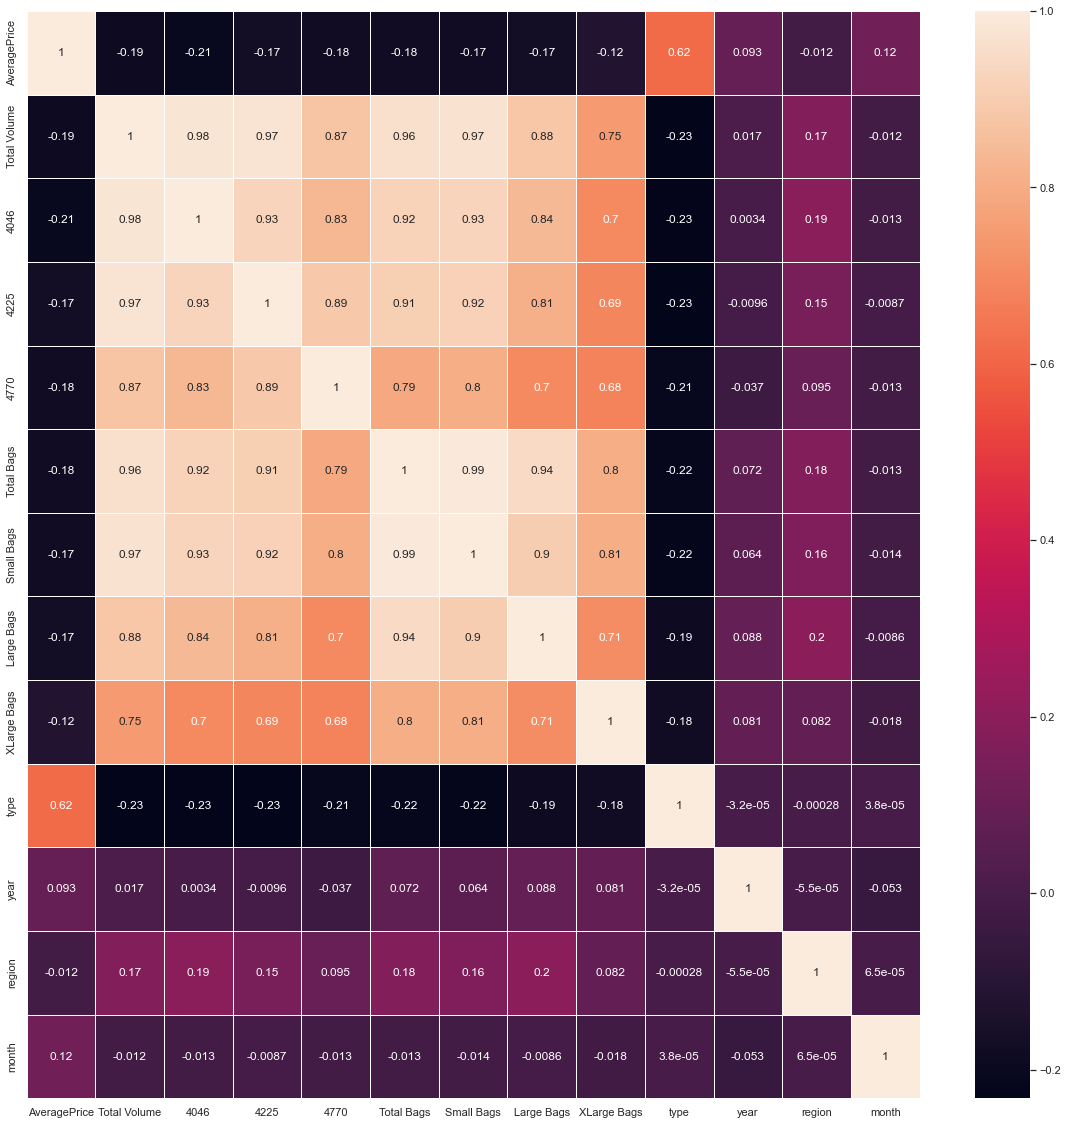

In [271]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=1)

(i) Only Type of avocado has high correaltion with the average price of Avacado

(ii) The Total Volume is much correlated with 4046,4225,4770,small bag,large bag,xlarge bag

(iii) There is availibility of multi collenearity 

# Removing of Outliers

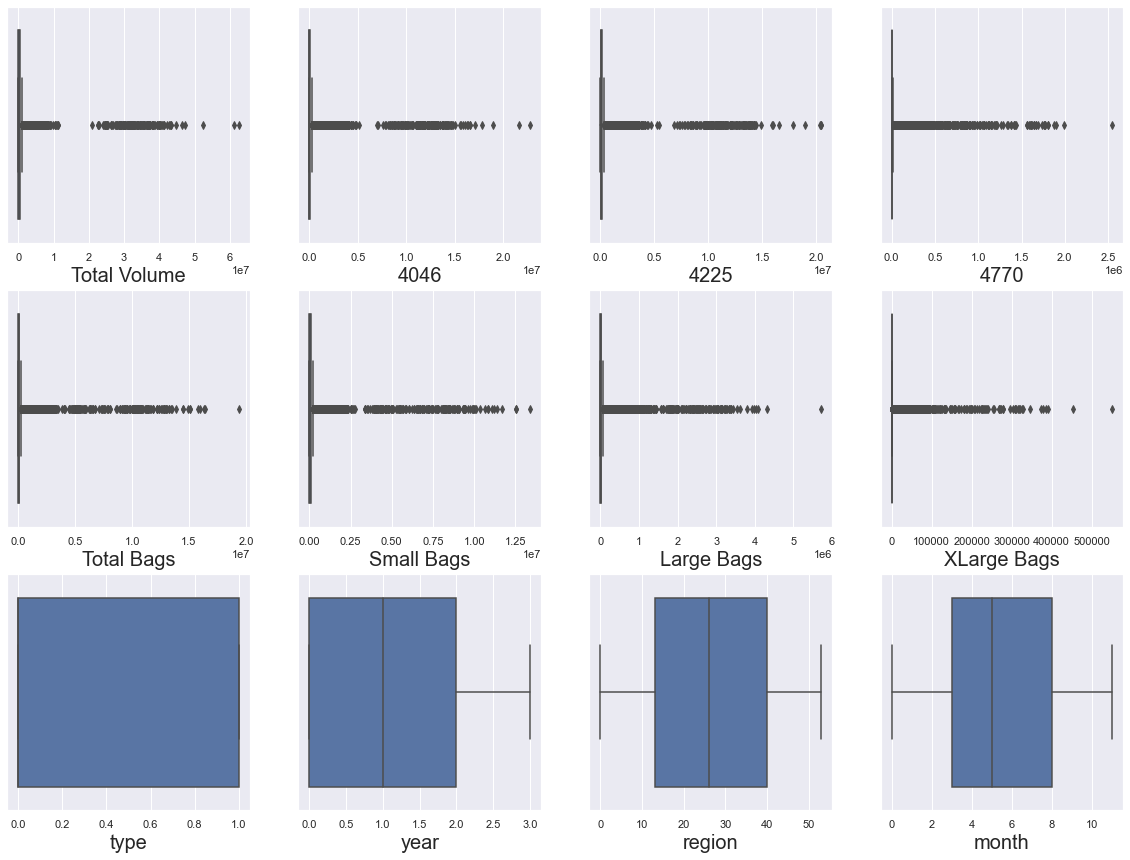

In [272]:

plt.figure(figsize=(20,20))
num=1
for col in df.drop(columns=['AveragePrice'],axis=1):
    if num<=13:
        plt.subplot(4,4,num)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    num+=1
plt.show()

There are outliers 

In [273]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df2=df
df=df[(z<3).all(axis=1)]
print('The shape before removing outliers',df2.shape)
print('The shape after removing outliers',df.shape)

The shape before removing outliers (18249, 13)
The shape after removing outliers (17651, 13)


In [274]:
a=(18249-17782)*100/18249
print(a)

2.55904433119623


Data loss is 2.55 % , which is accpatable

In [275]:
x=df.drop(columns=['AveragePrice'],axis=1)
y=df['AveragePrice']

Separated the Features and targer=t

# Feature Selection , Removing Multicollenearity of dataset

In [276]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['Vif Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [277]:
vif_calc()


      Vif Factor      Features
0   4.979203e+08  Total Volume
1   8.730848e+07          4046
2   7.507074e+07          4225
3   5.283334e+05          4770
4   2.333471e+13    Total Bags
5   1.518921e+13    Small Bags
6   1.478286e+12    Large Bags
7   7.092596e+09   XLarge Bags
8   2.101920e+00          type
9   2.207446e+00          year
10  2.970897e+00        region
11  2.624602e+00         month


In [278]:
from sklearn.feature_selection import SelectKBest, f_classif

In [279]:
best=SelectKBest(score_func = f_classif, k = 12)
fit=best.fit(x,y)
x_scores=pd.DataFrame(fit.scores_)
x_columns=pd.DataFrame(x.columns)
x_columns.head()
F_score=pd.concat([x_columns,x_scores],axis = 1)
F_score.columns=['Features','Score']
print(F_score.nlargest(22,'Score'))

        Features      Score
8           type  58.944331
1           4046  16.873179
0   Total Volume  13.664426
4     Total Bags  10.533173
6     Large Bags   9.162382
5     Small Bags   9.154321
3           4770   7.670776
2           4225   6.932504
9           year   3.556888
7    XLarge Bags   3.078580
11         month   2.065172
10        region   1.167461


In [280]:
x.drop(columns=['4225','Large Bags'],axis=1,inplace=True) 
#x.drop(columns=['month','region'],axis=1,inplace=True)

Found the the 4225 and Large Bags has covarience, so removed the columns

# Scaling

In [281]:
df3=x.copy()

In [282]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=df3.columns)

Scaled the data set for easy calculation and better result

# Removing the skewness 

In [283]:
x.skew()

Total Volume    3.767138
4046            4.909848
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
month           0.029197
dtype: float64

In [284]:
skewed_cols=['Total Volume','4046','4770','Total Bags','Small Bags','XLarge Bags']

In [285]:
from sklearn.preprocessing import PowerTransformer

In [286]:
y_john=PowerTransformer(method='yeo-johnson',standardize=True)

In [287]:
#df_trans=df.drop(columns=['AveragePrice'],axis=1)


In [288]:
df4=y_john.fit_transform(x)

In [289]:
df_trans=pd.DataFrame(df4,columns=x.columns)

In [290]:
df_trans.skew()

Total Volume    0.728259
4046            1.006111
4770            1.196401
Total Bags      0.677480
Small Bags      0.706580
XLarge Bags     1.682479
type           -0.037741
year            0.056766
region          0.003622
month           0.002055
dtype: float64

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

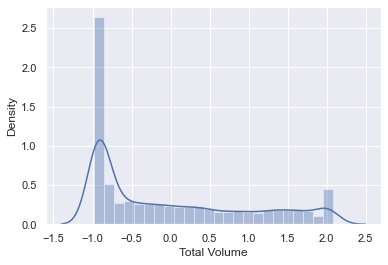

In [291]:
sns.distplot(df_trans['Total Volume'])

In [292]:
df_trans['Total Volume'].head(10)

0   -0.571229
1   -0.626867
2   -0.271095
3   -0.485717
4   -0.649995
5   -0.620255
6   -0.460384
7   -0.317624
8   -0.369550
9   -0.512397
Name: Total Volume, dtype: float64

In [293]:
x[skewed_cols]=df_trans[skewed_cols]

# Finding the best random state and spliting of data 

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [295]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxACC=acc
        maxRS=i
print("Best Accuracy is ",maxAcc,"on Random State",maxRS)

Best Accuracy is  0 on Random State 99


In [296]:
x.describe()

,Total Volume,4046,4770,Total Bags,Small Bags,XLarge Bags,type,year,region,month
count,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04
mean,1.679392e-17,-1.865472e-15,1.147493e-14,-5.332543e-17,-1.870598e-15,8.521136e-15,5.573088e-14,1.518374e-14,-9.283077e-16,-5.372609e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-9.751248e-01,-7.865618e-01,-6.794951e-01,-1.049279e+00,-1.017059e+00,-5.139068e-01,-1.019047e+00,-1.210013e+00,-1.695495e+00,-1.627372e+00
25%,-9.054489e-01,-7.691351e-01,-6.794951e-01,-9.285093e-01,-9.297244e-01,-5.139068e-01,-1.019047e+00,-1.210013e+00,-8.510962e-01,-7.306203e-01
50%,-3.673915e-01,-6.252789e-01,-6.300162e-01,-2.368160e-01,-3.132045e-01,-5.139068e-01,9.813089e-01,-1.464236e-01,-6.697402e-03,-1.327862e-01
75%,7.856901e-01,7.233755e-01,5.667911e-01,6.918755e-01,7.211562e-01,-3.006689e-01,9.813089e-01,9.171662e-01,8.377014e-01,7.639650e-01
max,2.074129e+00,2.149091e+00,2.204365e+00,2.092916e+00,2.112574e+00,2.438224e+00,9.813089e-01,1.980756e+00,1.747054e+00,1.660716e+00


In [297]:
x.shape

(17651, 10)

In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)

Splitted the dataset with recommended Random State

# Model Training

In [299]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LinearRegression

In [300]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
svr=SVR()
SGD=SGDRegressor()
R=Ridge()
L=Lasso()
model=[lr,rfr,dtr,knn,svr,SGD,R,L]

instanciate all the regression model

In [301]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Model :" ,m)
    print("r2 score:",r2_score(y_test,y_pred))
    print("MSE :",mean_squared_error(y_test,y_pred))
    print ("MAE :",mean_absolute_error(y_test,y_pred))
    print(20*"--")

Model : LinearRegression()
r2 score: 0.4796196151449952
MSE : 0.07576173231393404
MAE : 0.2130882299406625
----------------------------------------
Model : RandomForestRegressor()
r2 score: 0.8613516123878786
MSE : 0.02018569941093175
MAE : 0.10040492778249786
----------------------------------------
Model : DecisionTreeRegressor()
r2 score: 0.711757374431075
MSE : 0.041964995751911635
MAE : 0.13492495043896913
----------------------------------------
Model : KNeighborsRegressor()
r2 score: 0.7692276921717636
MSE : 0.03359794165958652
MAE : 0.12853752478051544
----------------------------------------
Model : SVR()
r2 score: 0.6595694053041063
MSE : 0.04956299725634368
MAE : 0.1659252150226379
----------------------------------------
Model : SGDRegressor()
r2 score: 0.4801888340564159
MSE : 0.07567886022257514
MAE : 0.21270865647013373
----------------------------------------
Model : Ridge()
r2 score: 0.47962950609631805
MSE : 0.07576029229884458
MAE : 0.21307862502774122
--------------

Model Cross Validation

In [302]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [303]:
for m in model:
    print(m,'Cross Validation Score:')
    print(cross_val_score(m,x,y,cv=ShuffleSplit(5)).mean())

LinearRegression() Cross Validation Score:
0.46216763035412106
RandomForestRegressor() Cross Validation Score:
0.8723998234100403
DecisionTreeRegressor() Cross Validation Score:
0.7288963501258927
KNeighborsRegressor() Cross Validation Score:
0.7882148691377764
SVR() Cross Validation Score:
0.6565246417117482
SGDRegressor() Cross Validation Score:
0.46019413723557234
Ridge() Cross Validation Score:
0.4707498036145809
Lasso() Cross Validation Score:
-0.00029789414069947284


Found RandomForestRegressor is the best with 86% accuracy and 86% cross validation

# Hyper Parameter Tuning

In [304]:
from sklearn.model_selection import GridSearchCV

In [305]:
parameter={'n_estimators':[60,80,100],'max_depth':[10,20,30],
          'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']
          ,'min_samples_leaf':[5,6,8],'min_samples_split':[5,10]}

In [306]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=2,n_jobs=-1,verbose=1)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
print(GCV.best_params_)

In [307]:
fin_mod=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=30,
                             max_features='auto',min_samples_split=5,min_samples_leaf=5)

In [308]:
fin_mod.fit(x_train,y_train)
pred=fin_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

83.8844524943971


Found the accuracy with 83% after Hypertunig , due to comutation speed constarint and time constraint could not try for better

# Saving the Model


In [309]:
import joblib
joblib.dump(fin_mod,"Avocado_regression.pkl")

['Avocado_regression.pkl']

Regression model completed

# Classification Model 

In [310]:
df2=pd.read_csv('avocado.csv')



In [311]:
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [312]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [313]:
df2['month']=pd.DatetimeIndex(df2['Date']).month

In [314]:
dumm=pd.get_dummies(df2[['type']],drop_first= False)

In [315]:
df2=df2.join(dumm)

In [316]:
df2.drop(columns=['type'],inplace=True)

In [317]:
x=df2.drop(columns=['Unnamed: 0','region','Date'])
y=df2['region']

Scaling of data 

In [318]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [319]:
scaled_x=scaler.fit_transform(x)

In [320]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [321]:
vif=pd.DataFrame()

In [322]:
vif["Features"]=x.columns
vif['vif']=[variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [323]:
vif

,Features,vif
0,AveragePrice,1.780486e+00
1,Total Volume,4.926910e+09
2,4046,6.610199e+08
3,4225,5.989389e+08
4,4770,4.770681e+06
5,Total Bags,2.370316e+14
6,Small Bags,1.364727e+14
7,Large Bags,1.448103e+13
8,XLarge Bags,7.622239e+10
9,year,1.113538e+00


In [324]:
from sklearn.decomposition import PCA

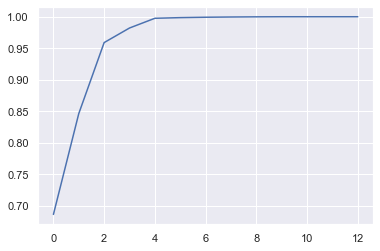

In [325]:
pca=PCA()
principleComponents=pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

12 Components explain around 95% variance in Dataset

In [326]:
pca=PCA(n_components=12)
comp=pca.fit_transform(scaled_x)
principle_x=pd.DataFrame(comp,columns=np.arange(12))

In [327]:
from sklearn.feature_selection import SelectKBest, f_classif

In [328]:
bestfeat=SelectKBest(score_func=f_classif,k=13)
fit=bestfeat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(13,'Score'))

              Feature       Score
1        Total Volume  319.035278
3                4225  308.834412
6          Small Bags  298.998145
2                4046  295.483768
5          Total Bags  295.176645
7          Large Bags  254.735012
4                4770  208.050643
8         XLarge Bags  123.297554
0        AveragePrice   69.383811
11  type_conventional    0.000496
12       type_organic    0.000496
10              month    0.000132
9                year    0.000018


In [329]:
x_best=x.drop(columns=['year','month'])

In [330]:
x_best.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,0


In [331]:
scaled_x_best=scaler.fit_transform(x_best)

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

KeyboardInterrupt: 

In [333]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31,random_state = 45)



In [334]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

In [335]:
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=117)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*"===")

In [336]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GNB =  GaussianNB()
KNN = KNeighborsClassifier()
LR=LogisticRegression()

In [337]:
models=[DTC,RFC,ABC,GNB,KNN,LR]

In [338]:
for m in models:
    model_test(m)

DecisionTreeClassifier()
0.7998173515981735
[[ 88   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   1]
 [  0   0  86 ...   0   0   1]
 ...
 [  0   0   0 ... 100   1   0]
 [  0   0   0 ...   0  90   0]
 [  0   2   4 ...   0   0  63]]
                     precision    recall  f1-score   support

             Albany       0.81      0.88      0.84       100
            Atlanta       0.67      0.79      0.72       103
BaltimoreWashington       0.90      0.87      0.88        99
              Boise       0.83      0.84      0.83       104
             Boston       0.80      0.87      0.83        91
   BuffaloRochester       0.76      0.78      0.77       108
         California       0.94      0.97      0.95        94
          Charlotte       0.83      0.81      0.82       103
            Chicago       0.90      0.94      0.92       106
   CincinnatiDayton       0.77      0.81      0.79        88
           Columbus       0.67      0.73      0.70        98
      DallasFtWorth       0.87 

GaussianNB()
0.2964383561643836
[[32  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  8]
 [10  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  0  0]
 [ 0  4  0 ...  3 43  0]
 [ 6  0  0 ...  0  0  8]]
                     precision    recall  f1-score   support

             Albany       0.12      0.32      0.17       100
            Atlanta       0.42      0.27      0.33       103
BaltimoreWashington       0.69      0.40      0.51        99
              Boise       0.39      0.37      0.38       104
             Boston       0.59      0.38      0.47        91
   BuffaloRochester       0.36      0.28      0.31       108
         California       0.65      0.44      0.52        94
          Charlotte       0.68      0.22      0.34       103
            Chicago       0.81      0.45      0.58       106
   CincinnatiDayton       0.87      0.38      0.52        88
           Columbus       0.43      0.15      0.23        98
      DallasFtWorth       0.30      0.08      0.13       106
             Denve

RandomForestRegressor as best with 91% accuarcy

In [ ]:
# GridSearchCV for RandomForestClassifier
parameters = { 'n_estimators': [80,100,200], 'criterion': ['gini', 'entropy'], 'max_features':
              ['auto', 'sqrt', 'log2'],'max_depth':[2,3,4]}
gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=2)
gsc.fit(scaled_x_best,y)
gsc.best_params_

In [339]:
rfc = RandomForestClassifier(criterion= 'gini', max_features='auto', n_estimators= 100,max_depth=4)
rfc.fit(x_train, y_train)
model_test(rfc)

RandomForestClassifier(max_depth=4)
0.2873059360730594
[[ 0  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0 11]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  1 61  0]
 [ 0  0  0 ...  0  0 31]]
                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00       100
            Atlanta       0.70      0.18      0.29       103
BaltimoreWashington       0.38      0.42      0.40        99
              Boise       0.40      0.02      0.04       104
             Boston       0.58      0.45      0.51        91
   BuffaloRochester       0.00      0.00      0.00       108
         California       0.94      0.52      0.67        94
          Charlotte       0.00      0.00      0.00       103
            Chicago       0.72      0.48      0.58       106
   CincinnatiDayton       0.09      0.55      0.15        88
           Columbus       0.15      0.21      0.17        98
      DallasFtWorth       0.64      0.39      0.48      

In [340]:
#saving the model
joblib.dump(RFC,'Avocado_classification.pkl')

['Avocado_classification.pkl']

Due to computer computation and time constraints could not use Hyper parameters
correct way 